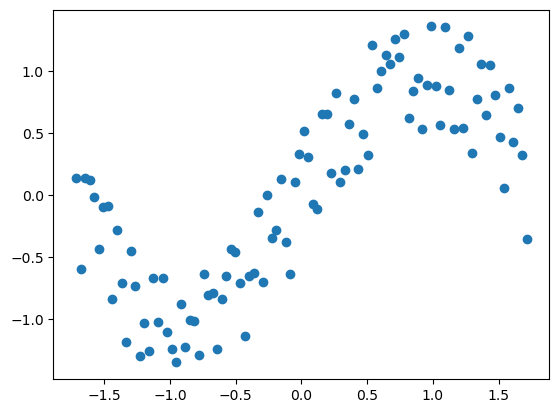

Loss at epoch 0: 15.59
Loss at epoch 100: 0.31
Loss at epoch 200: 0.19
Loss at epoch 300: 0.14
Loss at epoch 400: 0.11
Loss at epoch 500: 0.10
Loss at epoch 600: 0.10
Loss at epoch 700: 0.09
Loss at epoch 800: 0.09
Loss at epoch 900: 0.09


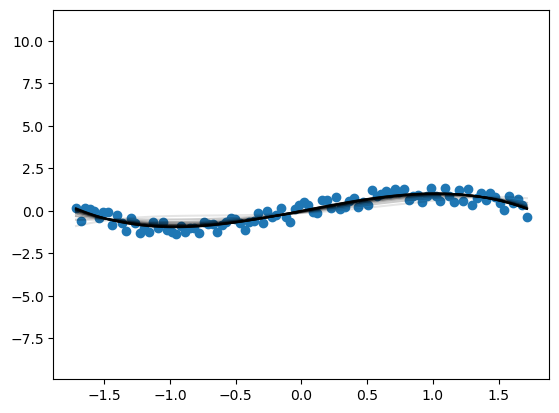

R-squared:  0.8548458607091413


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Generate toy data
n_observations = 100
xs = np.linspace(-3, 3, n_observations).astype(np.float32)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations).astype(np.float32)

# Normalize the input data
xs = (xs - np.mean(xs)) / np.std(xs)

plt.scatter(xs, ys)
plt.show()

class PolyModel(tf.keras.Model):
    def __init__(self, degree=7):
        super(PolyModel, self).__init__()
        self.degree = degree
        self.W = tf.Variable(tf.random.normal([degree]), name='weight')
        self.B = tf.Variable(0., name='bias')

    def call(self, inputs):
        Y_pred = tf.fill(tf.shape(inputs), self.B)
        for pow_i in range(self.degree):
            Y_pred += tf.pow(inputs, pow_i) * self.W[pow_i]
        return Y_pred

model = PolyModel(degree=5)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.015)

n_epochs = 1000
for epoch_i in range(n_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(xs[:, None])
        loss = loss_fn(ys, y_pred[:, 0])

    gradients = tape.gradient(loss, model.trainable_variables)
    # Apply gradient clipping
    gradients = [(tf.clip_by_value(grad, -1., 1.)) for grad in gradients]

    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch_i % 100 == 0:
        print('Loss at epoch %d: %.2f' % (epoch_i, loss))
        plt.plot(xs, y_pred.numpy(), 'k', alpha=epoch_i / n_epochs)

plt.scatter(xs, ys)
plt.show()
y_pred = model(xs[:, None]).numpy()

# Compute R-squared
r2 = r2_score(ys, y_pred)

print("R-squared: ", r2)